In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge,RidgeCV
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline

In [2]:
df = pd.read_csv('ToyotaCorolla.csv', usecols=["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"])
df.head()

Price  Age_08_04     KM  HP    cc  Doors  Gears  Quarterly_Tax  Weight
0  13500         23  46986  90  2000      3      5            210    1165
1  13750         23  72937  90  2000      3      5            210    1165
2  13950         24  41711  90  2000      3      5            210    1165
3  14950         26  48000  90  2000      3      5            210    1165
4  13750         30  38500  90  2000      3      5            210    1170

In [4]:
ProfileReport(df)

In [6]:
plt.rcParams['figure.figsize'] = (10,8)

<AxesSubplot:>

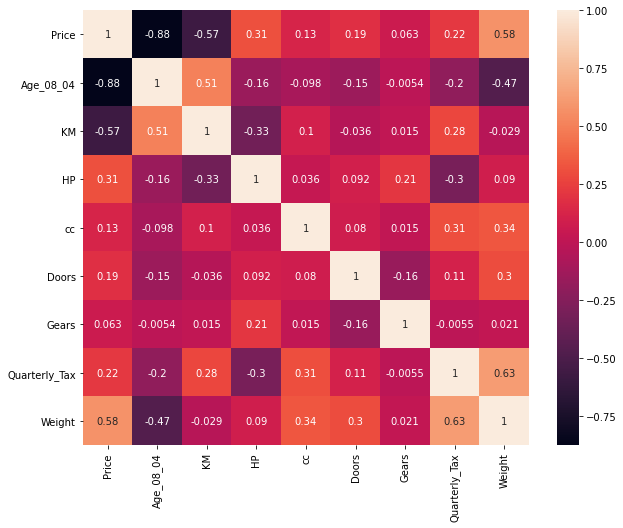

In [7]:
corr = df.corr()
sns.heatmap(corr, annot=True)

In [12]:
scalar = StandardScaler()
scaled_df = scalar.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)
scaled_df

Price  Age_08_04        KM        HP        cc     Doors     Gears  Quarterly_Tax    Weight
0     0.763763  -1.771966 -0.574695 -0.768042  0.997419 -1.085139 -0.140425       2.988680  1.758561
1     0.832715  -1.771966  0.117454 -0.768042  0.997419 -1.085139 -0.140425       2.988680  1.758561
2     0.887877  -1.718184 -0.715386 -0.768042  0.997419 -1.085139 -0.140425       2.988680  1.758561
3     1.163685  -1.610620 -0.547650 -0.768042  0.997419 -1.085139 -0.140425       2.988680  1.758561
4     0.832715  -1.395491 -0.801028 -0.768042  0.997419 -1.085139 -0.140425       2.988680  1.853577
...        ...        ...       ...       ...       ...       ...       ...            ...       ...
1431 -0.891089   0.702015 -1.279939 -1.035138 -0.652594 -1.085139 -0.140425      -0.440785 -0.901883
1432  0.031491   0.863362 -1.321120 -1.035138 -0.652594 -1.085139 -0.140425      -0.440785 -1.091915
1433 -0.615281   0.809579 -1.374036 -1.035138 -0.652594 -1.085139 -0.140425      -0.440785 -1.091915
1434 -0.960042   0.755797 -1.376703 -1.035138 -0.652594 -1.085139 -0.140425      -0.440785 -1.091915
1435 -1.042784   1.078490 -1.827849  0.567440  0.054555  1.014941 -0.140425      -1.656907  0.789399

[1436 rows x 9 columns]

**FINDING MULTICOLLINIEARITY**

In [17]:
x_var = scaled_df[['Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight']]
VIF = pd.DataFrame()
VIF['VIF'] = [variance_inflation_factor(x_var.values,i) for i in range(x_var.shape[1])]
VIF['Feature'] = x_var.columns
VIF

VIF        Feature
0  1.884620      Age_08_04
1  1.756905             KM
2  1.419422             HP
3  1.163894             cc
4  1.156575          Doors
5  1.098723          Gears
6  2.311431  Quarterly_Tax
7  2.516420         Weight

- No feature has a high VIF value, so we will take all of these features as there is no multicollinearity in the dataset.

<AxesSubplot:>

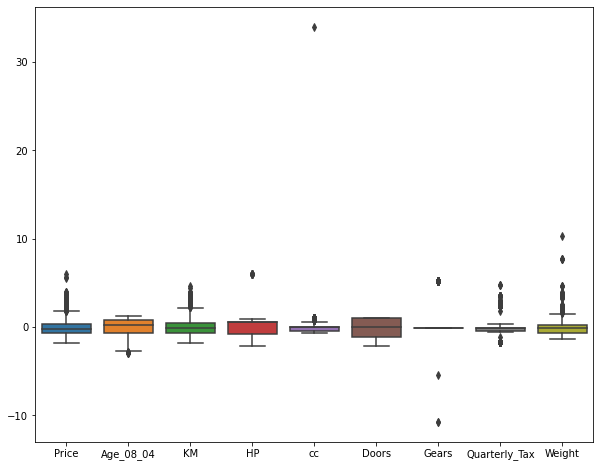

In [18]:
sns.boxplot(data=scaled_df)

## Model Building

**Normal regression model**

In [19]:
x = scaled_df[['Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight']]
y = scaled_df['Price']

In [25]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2, random_state = 10)

In [26]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [27]:
model_pred = model.predict(x_test)

In [29]:
from sklearn.metrics import r2_score, mean_squared_error

r2 = r2_score(y_test, model_pred)
mse = mean_squared_error(y_test,model_pred)
print(f'The R2 value is: {r2} \nThe MSE is: {mse}')

The R2 value is: 0.8631151482116789 
The MSE is: 0.1528002590475283


**Least Square Regression**

In [33]:
sm_model = sm.OLS(y,x).fit()
sm_pred = sm_model.predict(x)
sm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.864
Model:                            OLS   Adj. R-squared (uncentered):              0.863
Method:                 Least Squares   F-statistic:                              1132.
Date:                Sat, 05 Mar 2022   Prob (F-statistic):                        0.00
Time:                        11:20:13   Log-Likelihood:                         -606.37
No. Observations:                1436   AIC:                                      1229.
Df Residuals:                    1428   BIC:                                      1271.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Age_08_04        -0.6239      0.013    -46.528      0.000      -0.650      -0.598
KM               -0.2153      0.013    -16.627      0.000      -0.241      -0.190
HP                0.1309      0.012     11.245      0.000       0.108       0.154
cc               -0.0142      0.011     -1.345      0.179      -0.035       0.007
Doors            -0.0004      0.011     -0.040      0.968      -0.021       0.020
Gears             0.0309      0.010      3.017      0.003       0.011       0.051
Quarterly_Tax     0.0448      0.015      3.016      0.003       0.016       0.074
Weight            0.2461      0.015     15.885      0.000       0.216       0.277
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                         3.04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Lasso Regression**

In [34]:
lassocv = LassoCV(alphas=None, max_iter=1000,normalize=True,cv = 10)
lassocv.fit(x_train,y_train)

LassoCV(cv=10, normalize=True)

In [35]:
lassocv.alpha_

0.0010285701857416594

In [36]:
lasso_model = Lasso(alpha=lassocv.alpha_)
lasso_model.fit(x_train,y_train)

Lasso(alpha=0.0010285701857416594)

The R2 score of Lasso regression is:  0.8627560628853825
   Coefficient    Feature
0    -0.621053  Age_08_04
1    -0.209880         KM
2     0.129463         HP
3    -0.004162         cc
4     0.000000      Doors


<BarContainer object of 8 artists>

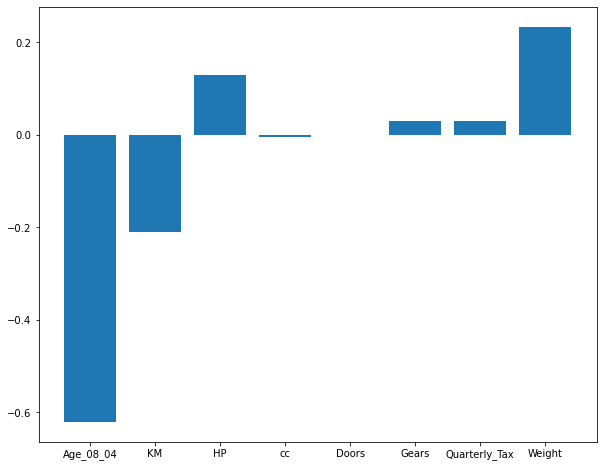

In [44]:
lasso_pred = lasso_model.predict(x_test)

R2_value = r2_score(y_test,lasso_pred)
print('The R2 score of Lasso regression is: ', R2_value)

lasso_coef = pd.DataFrame()
lasso_coef['Coefficient'] = pd.Series(lasso_model.coef_)
lasso_coef['Feature'] = x_train.columns
print(lasso_coef.head())

plt.bar(lasso_coef['Feature'], lasso_coef['Coefficient'])

**RIDGE REGRESSION**

In [45]:
ridgecv = RidgeCV(alphas=np.random.uniform(0,10,30),cv= 10, normalize=True)

ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([6.46260539, 3.44641478, 3.83153782, 1.41309617, 7.05113933,
       3.6498797 , 1.33292465, 2.49793551, 6.16213848, 8.03573334,
       2.19452616, 8.57413744, 1.70277899, 4.77528738, 7.6589456 ,
       3.95671779, 8.00017017, 2.39206847, 8.03230938, 6.65421496,
       4.30305901, 4.65436722, 7.01679269, 3.67093014, 5.98955591,
       2.46357786, 1.86120112, 2.75626908, 8.11891464, 1.10587984]),
        cv=10, normalize=True)

In [46]:
ridgecv.alpha_

1.1058798397462155

In [49]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train,y_train)

Ridge(alpha=1.1058798397462155)

The R2 value of Ridge model is:  0.8630610372696885
   Coefficient    Feature
0    -0.620343  Age_08_04
1    -0.211231         KM
2     0.130459         HP
3    -0.005467         cc
4     0.000849      Doors


<BarContainer object of 8 artists>

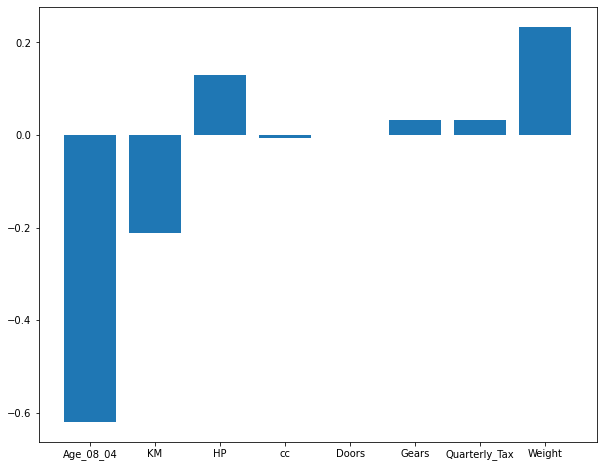

In [52]:
ridge_pred = ridge_model.predict(x_test)
r2_ridge = r2_score(y_test,ridge_pred)
print('The R2 value of Ridge model is: ', r2_ridge)

ridge_coef = pd.DataFrame()
ridge_coef['Coefficient'] = pd.Series(ridge_model.coef_)
ridge_coef['Feature'] = x_train.columns
print(ridge_coef.head())

plt.bar(ridge_coef['Feature'], ridge_coef['Coefficient'])

**R2 score of every model**

In [54]:
score_df = pd.DataFrame(data = np.array([0.86311,0.864,0.86275,0.86306]), index=['Base Model','Least_sq_method','Lasso_Reg','Ridge_Reg'], columns=['R2 value'])
score_df

R2 value
Base Model        0.86311
Least_sq_method   0.86400
Lasso_Reg         0.86275
Ridge_Reg         0.86306